In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os

import numpy as np
import pandas as pd
import tensorflow as tf

import atecml.data

from contextlib import contextmanager
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN
import random

plt.style.use('ggplot')

In [2]:
train_df,test_df = atecml.data.load()
predictors = [x for x in train_df.columns if x not in atecml.data.NOT_FEATURE_COLUMNS]
target = 'Fraud'

In [14]:
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegressionCV
#build Models...
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

model = {}

gbdt_params = {'boosting_type': 'gbdt',
               'n_estimators': 100,
               'use_missing' : True,
               'categorical_feature': 4,
               'is_unbalance': True,               
               'max_depth': -1,
               'num_leaves': 64, 
               'learning_rate': 0.05, 
               'max_bin': 512, 
               'subsample_for_bin': 200,
               'subsample': 0.8, 
               'subsample_freq': 1, 
               'colsample_bytree': 0.8, 
               'reg_alpha': 5, 
               'reg_lambda': 10,
               'min_split_gain': 0.5, 
               'min_child_weight': 1, 
               'min_child_samples': 5, 
               'scale_pos_weight': 1,
               'num_class' : 1,
               'metric' : 'binary_error',
               'seed': 42,
               'nthread': -1}


goss_params = {'boosting_type': 'goss',
               'n_estimators': 100,
               'use_missing' : True,
               'categorical_feature': 4,
               'is_unbalance': True,               
               'max_depth': -1,
               'num_leaves': 64, 
               'learning_rate': 0.05, 
               'max_bin': 512, 
               'subsample_for_bin': 200,
               'subsample': 1, 
               'subsample_freq': 1, 
               'colsample_bytree': 0.8, 
               'reg_alpha': 5, 
               'reg_lambda': 10,
               'min_split_gain': 0.5, 
               'min_child_weight': 1, 
               'min_child_samples': 5, 
               'scale_pos_weight': 1,
               'num_class' : 1,
               'metric' : 'binary_error',
               'seed': 42,
               'nthread': -1}


dart_params = {'boosting_type': 'dart',
               'n_estimators': 100,
               'use_missing' : True,
               'categorical_feature': 4,
               'is_unbalance': True,               
               'max_depth': -1,
               'num_leaves': 64, 
               'learning_rate': 0.05, 
               'max_bin': 512, 
               'subsample_for_bin': 200,
               'subsample': 1, 
               'subsample_freq': 1, 
               'colsample_bytree': 0.8, 
               'reg_alpha': 5, 
               'reg_lambda': 10,
               'min_split_gain': 0.5, 
               'min_child_weight': 1, 
               'min_child_samples': 5, 
               'scale_pos_weight': 1,
               'num_class' : 1,
               'metric' : 'binary_error',
               'seed': 42,
               'nthread': -1}

model["GBDT"] = LGBMClassifier(**gbdt_params)
model["GOSS"] = LGBMClassifier(**goss_params)
model["DART"] = LGBMClassifier(**dart_params)

In [15]:
clf1 = model["GBDT"]
clf2 = model["GOSS"] 
clf3 = model["DART"] 

In [16]:
clf1.fit(train_df[predictors],train_df[target])

LGBMClassifier(boosting_type='gbdt', categorical_feature=4, class_weight=None,
        colsample_bytree=0.8, is_unbalance=True, learning_rate=0.05,
        max_bin=512, max_depth=-1, metric='binary_error',
        min_child_samples=5, min_child_weight=1, min_split_gain=0.5,
        n_estimators=100, n_jobs=-1, nthread=-1, num_class=1,
        num_leaves=64, objective=None, random_state=None, reg_alpha=5,
        reg_lambda=10, scale_pos_weight=1, seed=42, silent=True,
        subsample=0.8, subsample_for_bin=200, subsample_freq=1,
        use_missing=True)

In [17]:
verify_df = atecml.data.load_train()
verify_data = atecml.data.filter_date(verify_df,start_date='2017-10-16',end_date='2018-10-15')
y_predict = clf1.predict_proba(verify_data[predictors])

0.5369299221357063


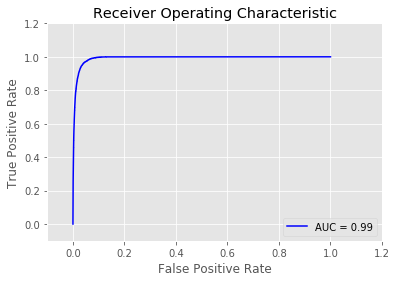

In [18]:
a,b,c=atecml.data.accuracy_validation(verify_data[target],pd.DataFrame(y_predict)[1])

In [19]:
fi = pd.DataFrame()
fi['imp']= clf1.feature_importances_
fi['feature'] = predictors

In [20]:
fi.sort_values('imp',ascending=False)

,imp,feature
6,359,f7
209,216,f210
5,150,f6
105,149,f106
24,124,f25
51,123,f52
14,122,f15
52,117,f53
247,102,f248
214,100,f215


In [51]:
import copy as copy

imp_feature = [ 'f105', 'f106', 'f14', 'f15', 'f17', 'f18', 'f185', 'f19', 'f204', 'f208', 'f209', 'f21', 'f210', 'f215', 'f217', 'f218', 'f23', 'f234', 'f235', 'f236', 'f237', 'f238', 'f241', 'f242', 'f243', 'f244', 'f245', 'f247', 'f248', 'f253', 'f262', 'f27', 'f278', 'f31', 'f33', 'f57', 'f6', 'f7', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f91']

feature_tree_num = 500
if (os.path.exists('./feature_list.dat')):
    print('Load Feature List from persistant store...')
    feature_list = joblib.load('./feature_list.dat')
else:
    print('Generate Random Feature List...')
    feature_list = {}
    predictors_wo_f5 = copy.deepcopy(predictors)
    predictors_wo_f5.remove('f5')
    for idx in range(0,feature_tree_num):
        feature_set = set(imp_feature + random.sample(predictors_wo_f5,20))
        feature_list[idx] = ['f5'] + list(feature_set)
    joblib.dump(feature_list,'./feature_list.dat')

Load Feature List from persistant store...


In [49]:
feature_list

{0: ['f5',
  'f17',
  'f15',
  'f120',
  'f64',
  'f31',
  'f220',
  'f242',
  'f57',
  'f21',
  'f210',
  'f217',
  'f262',
  'f185',
  'f236',
  'f7',
  'f86',
  'f85',
  'f209',
  'f253',
  'f106',
  'f6',
  'f190',
  'f237',
  'f218',
  'f23',
  'f19',
  'f245',
  'f83',
  'f84',
  'f14',
  'f105',
  'f243',
  'f241',
  'f151',
  'f238',
  'f244',
  'f247',
  'f38',
  'f233',
  'f18',
  'f208',
  'f228',
  'f160',
  'f248',
  'f215',
  'f82',
  'f183',
  'f249',
  'f81',
  'f234',
  'f204',
  'f27',
  'f278',
  'f206',
  'f33',
  'f235',
  'f91'],
 1: ['f5',
  'f55',
  'f17',
  'f15',
  'f31',
  'f242',
  'f57',
  'f21',
  'f145',
  'f210',
  'f217',
  'f262',
  'f185',
  'f236',
  'f7',
  'f86',
  'f85',
  'f209',
  'f207',
  'f253',
  'f106',
  'f6',
  'f237',
  'f218',
  'f23',
  'f19',
  'f245',
  'f83',
  'f84',
  'f102',
  'f14',
  'f123',
  'f105',
  'f243',
  'f241',
  'f238',
  'f244',
  'f247',
  'f233',
  'f18',
  'f208',
  'f191',
  'f43',
  'f141',
  'f97',
  'f248',
 